In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_excel("C:/Users/Sha pa/Downloads/Online Retail.xlsx")  # Encoding specified to avoid errors

# Preview the first 5 rows
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [3]:
print(f"Dataset shape: {df.shape}\n")

# Preview the first 5 rows
print(df.head())

# Check column data types and non-null counts
print("\nData info:")
print(df.info())

# Basic stats for numeric columns
print("\nDescriptive statistics:")
print(df.describe())

Dataset shape: (541909, 8)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtyp

#### Data Cleaning

In [4]:
#Remove rows with missing customer Id
df=df.dropna(subset=['CustomerID'])

#Remove negative values
df=df[(df['Quantity']>0)&(df['UnitPrice']>0)]

#Remove duplicates
df=df.drop_duplicates()

In [5]:
#Creating TotalPrice Column
df['TotalPrice']=df['Quantity'] * df['UnitPrice']


In [6]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34

##### Top 5  countries by revenue

Top 5 Countries by Revenue:Country
United Kingdom    7.285025e+06
Netherlands       2.854463e+05
EIRE              2.652625e+05
Germany           2.286784e+05
France            2.089343e+05
Name: TotalPrice, dtype: float64


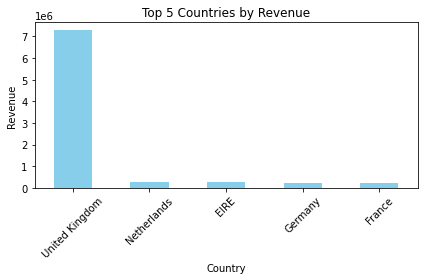

In [7]:
country_revenue=df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_5_countries=country_revenue.head()
print(f"Top 5 Countries by Revenue:{top_5_countries}")

#Plotting
top_5_countries.plot(kind='bar',color='skyblue')
plt.title("Top 5 Countries by Revenue")
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   YearMonth   TotalPrice
0    2010-12   570422.730
1    2011-01   568101.310
2    2011-02   446084.920
3    2011-03   594081.760
4    2011-04   468374.331
5    2011-05   677355.150
6    2011-06   660046.050
7    2011-07   598962.901
8    2011-08   644051.040
9    2011-09   950690.202
10   2011-10  1035642.450
11   2011-11  1156205.610
12   2011-12   517190.440


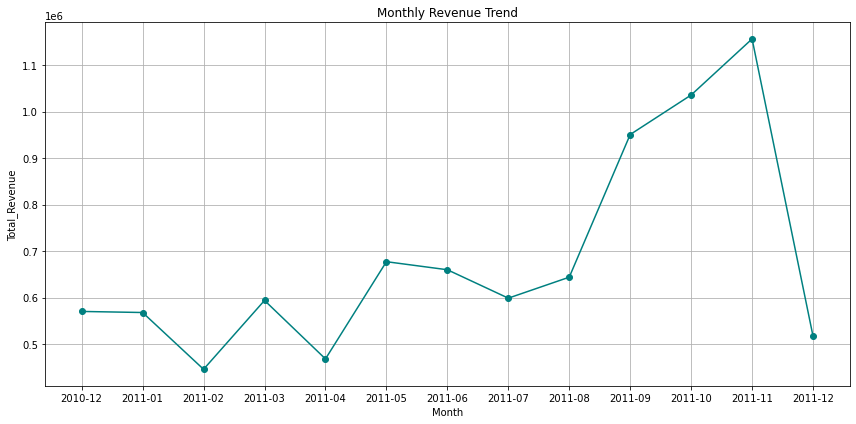

In [8]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['YearMonth']=df['InvoiceDate'].dt.to_period('M')
monthly_revenue=df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)
print(monthly_revenue)

#plotting
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue['YearMonth'],monthly_revenue['TotalPrice'],marker='o',color='teal')
plt.title("Monthly Revenue Trend")
plt.xlabel('Month')
plt.ylabel('Total_Revenue')
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_revenue_trend.png", dpi=300)  # dpi=300 gives high resolution

plt.show()

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


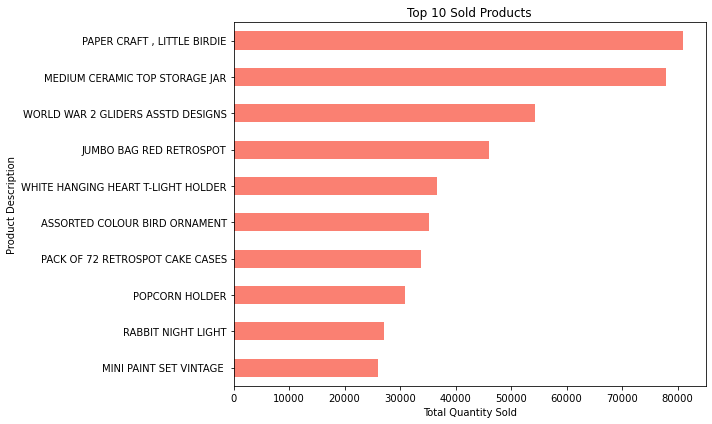

In [15]:
top_products=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

#plotting
plt.figure(figsize=(10,6))
top_products.sort_values().plot(kind='barh',color='salmon')
plt.title("Top 10 Sold Products")
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.savefig("top_10_sold_products.png",dpi=300)
plt.show()

In [16]:
#Top 10 Customers by Revenue

Top 10 Customers by Revenue
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


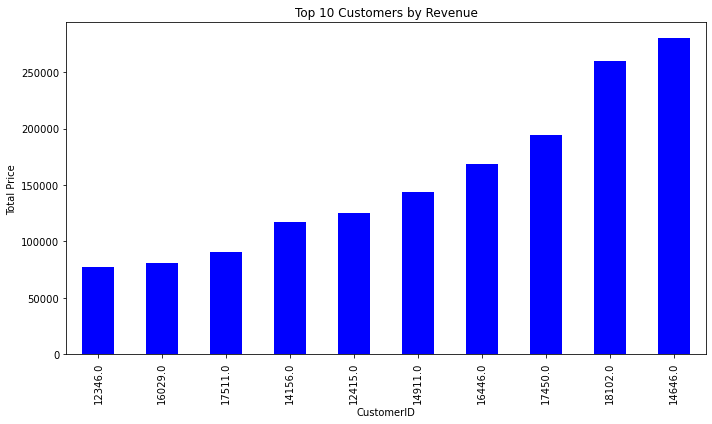

In [20]:
df_clean =df.dropna(subset=['CustomerID'])
top_customers=df_clean.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue")
print(top_customers)

#plotting
plt.figure(figsize=(10,6))
top_customers.sort_values().plot(kind='bar', color='blue')
plt.title("Top 10 Customers by Revenue")
plt.xlabel('CustomerID')
plt.ylabel('Total Price')
plt.tight_layout()
plt.savefig("Top_10_Customers_by_Revenue.png",dpi=300)
plt.show()

In [21]:
#Top 10 Products by Revenue

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalPrice, dtype: float64


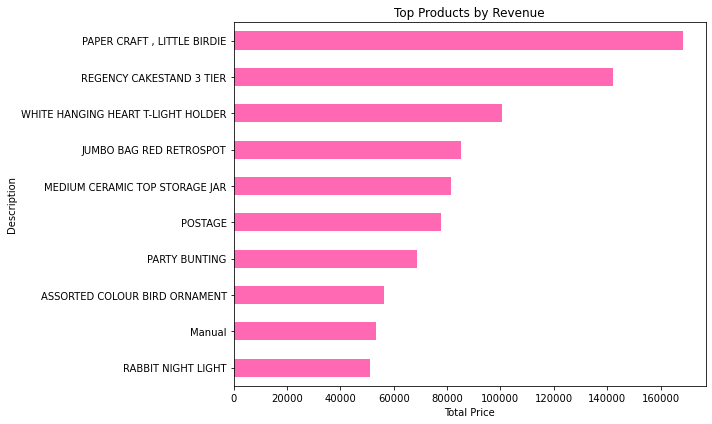

In [25]:
top_products_revenue=df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_products_revenue)

#plotting
plt.figure(figsize=(10,6))
top_products_revenue.sort_values().plot(kind='barh', color='hotpink')
plt.title("Top Products by Revenue")
plt.xlabel("Total Price")
plt.ylabel("Description")
plt.tight_layout()
plt.savefig("top_products_by_revenge.png",dpi=300)
plt.show()

In [26]:
#Calculate Recency
#Definition:
#Recency measures how recently a customer made a purchase. A lower number means a more recent purchase.

In [29]:
latest_date=df['InvoiceDate'].max()
recency_df=df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df.columns=['CustomerID','LastPurchaseDate']

recency_df['Recency']=(latest_date-recency_df['LastPurchaseDate']).dt.days
recency_df=recency_df.sort_values(by='Recency')
recency_df.head()

CustomerID    LastPurchaseDate  Recency
1661     14606.0 2011-12-08 19:28:00        0
871      13510.0 2011-12-08 13:46:00        0
1535     14441.0 2011-12-09 09:07:00        0
2913     16322.0 2011-12-08 15:41:00        0
1538     14446.0 2011-12-09 11:34:00        0

In [30]:
#Calculate Frequency
#Definition:
#Frequency counts how many times a customer made purchases (i.e., number of unique invoices).

In [32]:
frequency_df=df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns=['CustomerID','Frequency']
frequency_df=frequency_df.sort_values(by='Frequency',ascending=False)
frequency_df.head()

CustomerID  Frequency
326      12748.0        209
1879     14911.0        201
4010     17841.0        124
562      13089.0         97
1661     14606.0         93

In [34]:
monetary_df=df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.columns=['CustomerID','Monetary']
monetary_df=monetary_df.sort_values(by='Monetary',ascending=False)
monetary_df.head()

CustomerID   Monetary
1689     14646.0  280206.02
4201     18102.0  259657.30
3728     17450.0  194390.79
3008     16446.0  168472.50
1879     14911.0  143711.17

In [37]:
rfm=recency_df.merge(frequency_df,on='CustomerID')
rfm=rfm.merge(monetary_df, on='CustomerID')
rfm=rfm.sort_values(by='Monetary',ascending=False)
rfm.head()

CustomerID    LastPurchaseDate  Recency  Frequency   Monetary
137     14646.0 2011-12-08 12:12:00        1         73  280206.02
46      18102.0 2011-12-09 11:50:00        0         60  259657.30
581     17450.0 2011-12-01 13:29:00        7         46  194390.79
87      16446.0 2011-12-09 09:15:00        0          2  168472.50
83      14911.0 2011-12-08 15:54:00        0        201  143711.17

In [39]:
rfm['R_Score']=pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])
rfm['F_Score']=pd.qcut(rfm['Frequency'].rank(method='first'),4,labels=[1,2,3,4])
rfm['M_Score']=pd.qcut(rfm['Monetary'],4,labels=[4,3,2,1])
# Combine into a single score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

rfm.head()

CustomerID    LastPurchaseDate  Recency  Frequency   Monetary R_Score  \
137     14646.0 2011-12-08 12:12:00        1         73  280206.02       4   
46      18102.0 2011-12-09 11:50:00        0         60  259657.30       4   
581     17450.0 2011-12-01 13:29:00        7         46  194390.79       4   
87      16446.0 2011-12-09 09:15:00        0          2  168472.50       4   
83      14911.0 2011-12-08 15:54:00        0        201  143711.17       4   

    F_Score M_score M_Score RFM_Segment  RFM_Score  
137       4       1       1         441          9  
46        4       1       1         441          9  
581       4       1       1         441          9  
87        2       1       1         421          7  
83        4       1       1         441          9

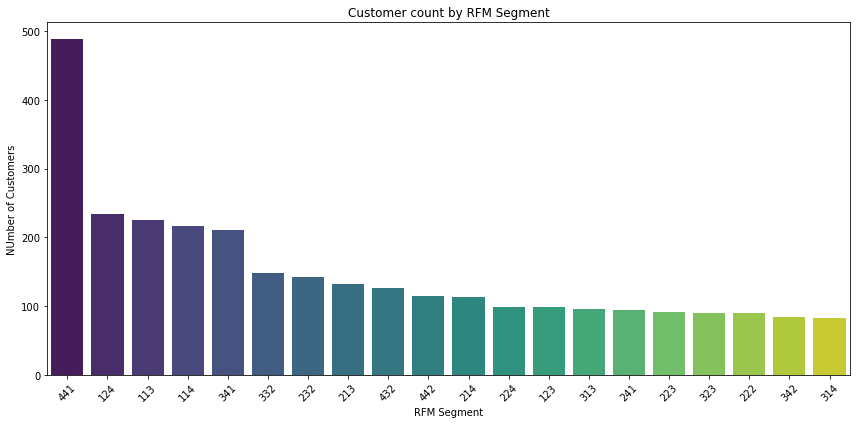

In [45]:
segment_counts=rfm['RFM_Segment'].value_counts().sort_values(ascending=False).head(20)

#Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=segment_counts.index,y=segment_counts.values,palette="viridis")
plt.title("Customer count by RFM Segment")
plt.xlabel('RFM Segment')
plt.ylabel('NUmber of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("rfm_segment_counts.png",dpi=300)
plt.show()


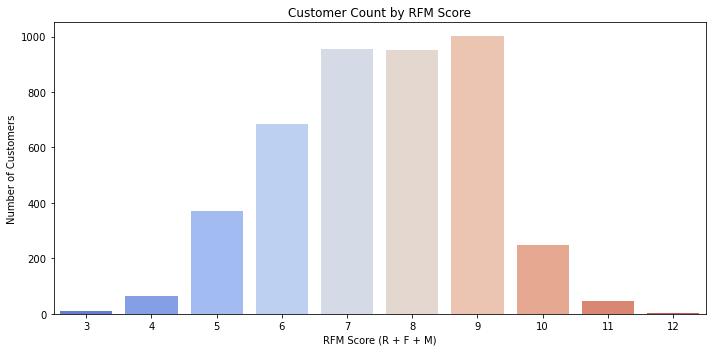

In [44]:
# Count by RFM Score (sum of R, F, M scores)
rfm_score_counts = rfm['RFM_Score'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=rfm_score_counts.index, y=rfm_score_counts.values, palette="coolwarm")
plt.title('Customer Count by RFM Score')
plt.xlabel('RFM Score (R + F + M)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig("rfm_score_distribution.png")
plt.show()


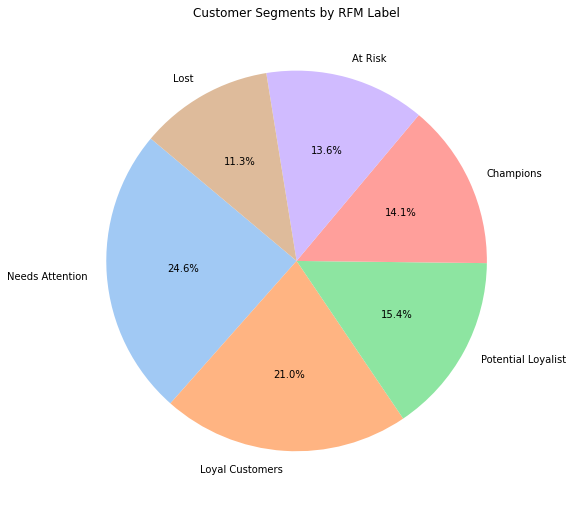

In [48]:
# Function to assign labels
def segment_customer(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] >= 3:
        return 'Potential Loyalist'
    elif row['R_Score'] == 2:
        return 'Needs Attention'
    elif row['R_Score'] == 1 and row['F_Score'] >= 2:
        return 'At Risk'
    else:
        return 'Lost'

# Create new column
rfm['RFM_Label'] = rfm.apply(segment_customer, axis=1)

# Count customers per segment
segment_distribution = rfm['RFM_Label'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(segment_distribution)]
plt.pie(segment_distribution, labels=segment_distribution.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segments by RFM Label')
plt.tight_layout()
plt.savefig("rfm_pie_chart.png")
plt.show()
